In [1]:
import sys
sys.path.append('..')
from theano import function, config, shared, sandbox
import theano.tensor as T
import numpy
import datetime
import theano_lstm
import numpy as np
import data_managers
import os

# Plotting
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN X


In [2]:
reload(data_managers)
data_butler = data_managers.character_data_manager('/home/arimorcos/Github/CS281-Final-Project/data manager/',
                                                   minmax_doc_length=[0,300])
data_butler.convert_ent_to_one_hot()

In [ ]:
# Create network 
config.mode="FAST_RUN"
hidden_size = 128
network = theano_lstm.lstm_rnn(300,
                  [(hidden_size, hidden_size),
                   (hidden_size, hidden_size)],
                  150, dropout=0.2)
# network.initialize_training_adadelta()
network.initialize_training_adam()

In [3]:
%%time
# Create network 
config.mode="FAST_RUN"
hidden_size = 128
network = theano_lstm.lstm_rnn(300,
                  [(hidden_size, hidden_size)],
                  150, dropout=0.2)
# network.initialize_training_adadelta()
network.initialize_training_adam(alpha=5e-5, beta1=0.95)

CPU times: user 53.4 s, sys: 384 ms, total: 53.8 s
Wall time: 53.7 s


Batch Size = 600;  Stride = 16
2400 examples per offer: Batch Size = 600  *  Permutations per = 4
Batch Size = 600;  Stride = 600


RuntimeError: CudaNdarray_ZEROS: allocation failed.
Apply node that caused the error: forall_inplace,gpu,grad_of_scan_fn}(Shape_i{0}.0, GpuElemwise{tanh,no_inplace}.0, GpuElemwise{Composite{(i0 - sqr(i1))},no_inplace}.0, GpuSubtensor{int64:int64:int64}.0, GpuSubtensor{int64:int64:int64}.0, GpuSubtensor{int64:int64:int64}.0, GpuSubtensor{int64:int64:int64}.0, GpuSubtensor{int64:int64:int64}.0, GpuAlloc{memset_0=True}.0, DeepCopyOp.0, GpuFromHost.0, GpuAlloc{memset_0=True}.0, GpuAlloc{memset_0=True}.0, GpuAlloc{memset_0=True}.0, GpuAlloc{memset_0=True}.0, GpuAlloc{memset_0=True}.0, GpuAlloc{memset_0=True}.0, GpuAlloc{memset_0=True}.0, GpuAlloc{memset_0=True}.0, GpuAlloc{memset_0=True}.0, Shape_i{0}.0, Shape_i{0}.0, <CudaNdarrayType(float32, matrix)>, <CudaNdarrayType(float32, col)>, <CudaNdarrayType(float32, matrix)>, <CudaNdarrayType(float32, col)>, <CudaNdarrayType(float32, matrix)>, <CudaNdarrayType(float32, col)>, <CudaNdarrayType(float32, matrix)>, <CudaNdarrayType(float32, col)>, GpuDimShuffle{1,0}.0, GpuDimShuffle{1,0}.0, GpuDimShuffle{1,0}.0, GpuDimShuffle{1,0}.0, GpuDimShuffle{1,0}.0, GpuDimShuffle{1,0}.0)
Inputs types: [TensorType(int64, scalar), CudaNdarrayType(float32, 3D), CudaNdarrayType(float32, 3D), CudaNdarrayType(float32, 3D), CudaNdarrayType(float32, 3D), CudaNdarrayType(float32, 3D), CudaNdarrayType(float32, 3D), CudaNdarrayType(float32, 3D), CudaNdarrayType(float32, 3D), CudaNdarrayType(float32, 3D), CudaNdarrayType(float32, 3D), CudaNdarrayType(float32, 3D), CudaNdarrayType(float32, (False, False, True)), CudaNdarrayType(float32, 3D), CudaNdarrayType(float32, (False, False, True)), CudaNdarrayType(float32, 3D), CudaNdarrayType(float32, (False, False, True)), CudaNdarrayType(float32, 3D), CudaNdarrayType(float32, (False, False, True)), CudaNdarrayType(float32, (False, False, True)), TensorType(int64, scalar), TensorType(int64, scalar), CudaNdarrayType(float32, matrix), CudaNdarrayType(float32, col), CudaNdarrayType(float32, matrix), CudaNdarrayType(float32, col), CudaNdarrayType(float32, matrix), CudaNdarrayType(float32, col), CudaNdarrayType(float32, matrix), CudaNdarrayType(float32, col), CudaNdarrayType(float32, matrix), CudaNdarrayType(float32, matrix), CudaNdarrayType(float32, matrix), CudaNdarrayType(float32, col), CudaNdarrayType(float32, matrix), CudaNdarrayType(float32, matrix)]
Inputs shapes: [(), (330, 128, 2400), (330, 128, 2400), (330, 300, 2400), (330, 128, 2400), (330, 128, 2400), (330, 128, 2400), (330, 128, 2400), (331, 128, 2400), (331, 128, 2400), (331, 128, 2400), (1, 128, 556), (1, 128, 1), (1, 128, 684), (1, 128, 1), (1, 128, 556), (1, 128, 1), (1, 128, 684), (1, 128, 1), (1, 128, 1), (), (), (128, 556), (128, 1), (128, 684), (128, 1), (128, 556), (128, 1), (128, 684), (128, 1), (556, 128), (684, 128), (684, 128), (128, 1), (128, 128), (556, 128)]
Inputs strides: [(), (307200, 2400, 1), (307200, 2400, 1), (-720000, 2400, 1), (-307200, 2400, 1), (-307200, 2400, 1), (-307200, 2400, 1), (-307200, 2400, 1), (307200, 2400, 1), (307200, 2400, 1), (307200, 2400, 1), (0, 556, 1), (0, 1, 0), (0, 684, 1), (0, 1, 0), (0, 556, 1), (0, 1, 0), (0, 684, 1), (0, 1, 0), (0, 1, 0), (), (), (556, 1), (1, 0), (684, 1), (1, 0), (556, 1), (1, 0), (684, 1), (1, 0), (1, 556), (1, 684), (1, 684), (1, 0), (1, 128), (1, 556)]
Inputs values: [array(330), 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', array(330), array(330), 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown']

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

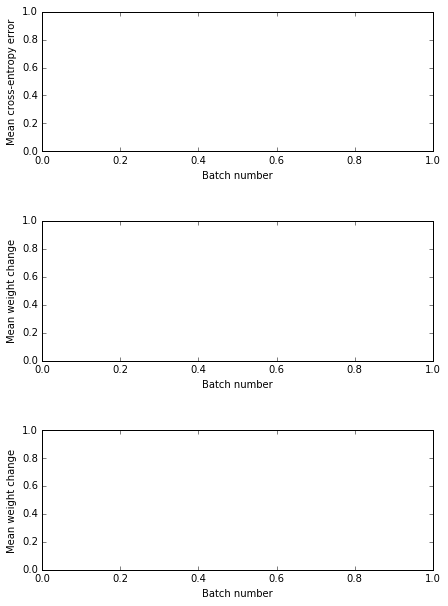

In [4]:
batch_size = 600
perms_per = 4
num_batches = 1000000
should_reinitialize = True
repeat_batch = 1
abbrev = 10

data_butler.set_batch_size(batch_size)
data_butler.set_perms_per(perms_per)
data_butler.set_stride(batch_size)

# Re-initialize network 
if should_reinitialize:
    network.initialize_network_weights()
    root_dir = '/media/1_TB_Internal/lstm_rnn_data'
    new_log_dir = os.path.join(root_dir, datetime.datetime.now().strftime('%y%m%d_%H%M%S'))
    network.set_log_dir(new_log_dir)

#Create plot 
fig = plt.figure(figsize=(7, 10))
fig.subplots_adjust(hspace=0.5)
ax_cost = fig.add_subplot(311)
ax_cost.set_xlabel('Batch number')
ax_cost.set_ylabel('Mean cross-entropy error')
ax_cost.get_yaxis().get_major_formatter().set_scientific(False)

ax_weight_change = fig.add_subplot(312)
ax_weight_change.set_xlabel('Batch number')
ax_weight_change.set_ylabel('Mean weight change')

ax_weight_change_ind = fig.add_subplot(313)
ax_weight_change_ind.set_xlabel('Batch number')
ax_weight_change_ind.set_ylabel('Mean weight change')
ax_weight_change_ind.hold(True)

# Initialize cost 
cost = []
mean_diff_mag = []
mean_diff_mag_i = []
mean_diff_mag_f = []
mean_diff_mag_c = []
mean_diff_mag_o = []
mean_diff_mag_y = []
mean_diff_mag_r = []

# Offer data
# vectors, lengths, answers = data_butler.offer_data()
# vectors = vectors[:abbrev, :, :]
# lengths = [min(abbrev, vec_len) for vec_len in lengths]

for batch in range(num_batches):
    
    # Get data
#     vectors, lengths, answers = data_butler.permute_examples()
#     vectors = vectors[:abbrev, :, :]
#     lengths = [min(abbrev, vec_len) for vec_len in lengths]
    vectors, lengths, answers = data_butler.offer_data()
    
    # Step 
#     temp_cost, param_diff = network.adadelta_step(vectors, lengths, answers)
    for repeat in range(repeat_batch):
        temp_cost, param_diff = network.adam_step(vectors, lengths, answers)
        cost.append(temp_cost.tolist())
    
        # Calculate mean param_diff magnitude
        temp_mean_diff_mag = [np.abs(diff).mean() for diff in param_diff]
        mean_diff_mag.append(np.mean(temp_mean_diff_mag))
        
        # append indi
        mean_diff_mag_i.append(temp_mean_diff_mag[0])
        mean_diff_mag_f.append(temp_mean_diff_mag[2])
        mean_diff_mag_c.append(temp_mean_diff_mag[4])
        mean_diff_mag_o.append(temp_mean_diff_mag[6])
        mean_diff_mag_y.append(temp_mean_diff_mag[8])
        mean_diff_mag_r.append(temp_mean_diff_mag[10])

        # Update plot 
        try:
            upper_lim = len(cost) + 1
        except:
            upper_lim = 2
        x_vals = range(1, upper_lim)
        ax_cost.plot(x_vals, cost, 'b')
        ax_weight_change.plot(x_vals, mean_diff_mag, 'r')
        ax_weight_change_ind.plot(x_vals, mean_diff_mag_i, 'b')
        ax_weight_change_ind.plot(x_vals, mean_diff_mag_f, 'r')
        ax_weight_change_ind.plot(x_vals, mean_diff_mag_c, 'g')
        ax_weight_change_ind.plot(x_vals, mean_diff_mag_o, 'k')
        ax_weight_change_ind.plot(x_vals, mean_diff_mag_y, 'm')
        ax_weight_change_ind.plot(x_vals, mean_diff_mag_r, 'c')
        display.clear_output(wait=True)
        display.display(fig)
    
    data_butler.advance_schedule()

In [ ]:
d = data_butler.get_current_doc()

In [ ]:
q = data_butler.get_current_queries()

In [ ]:
q[0]['a']

In [ ]:
d[0]['text']